In [1]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time

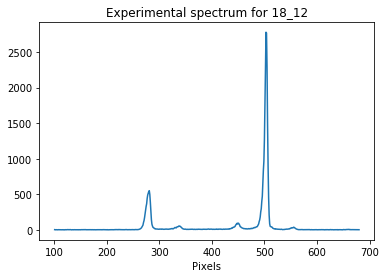

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


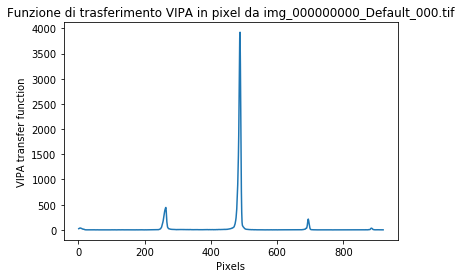

In [2]:
#1 ) Acquisizione Spettro e VIPA

y   =   loadmat('../Claudia/DaticellBoniPuntiDoppi/20191218_K27M')
y   =   y['y'][31][81]

y   =   y[:,0]

Data     =   Exp.Spectrum('18_12')
Data.Get_Spectrum(y = y, offset = 183., cut = True, cut_range = (100, 680), fig = 'Spectrum_Pix', save_path = '')
Data.Get_VIPA_tif(tif_filename = 'img_000000000_Default_000.tif', path ='../Claudia/DaticellBoniPuntiDoppi/picchi_elastici_con_filtro_100msexp/Pos0/', fig = 'VIPA_Pix', save_path = '')




 Ho trovato 5 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 32.93 
 Spessore > 0.00 



 Il picco 1 ha: 	 indice = 4 	 x_value (Pix) = 5.00 	 ampiezza(Pix) = 5.94 	 altezza = 38.17 


 Il picco 2 ha: 	 indice = 263 	 x_value (Pix) = 264.00 	 ampiezza(Pix) = 9.57 	 altezza = 444.80 


 Il picco 3 ha: 	 indice = 487 	 x_value (Pix) = 488.00 	 ampiezza(Pix) = 6.34 	 altezza = 3921.86 


 Il picco 4 ha: 	 indice = 693 	 x_value (Pix) = 694.00 	 ampiezza(Pix) = 5.70 	 altezza = 214.13 


 Il picco 5 ha: 	 indice = 883 	 x_value (Pix) = 884.00 	 ampiezza(Pix) = 6.38 	 altezza = 33.54 



{'n_peaks': 5,
 'peaks_idx': array([  4, 263, 487, 693, 883], dtype=int64),
 'peaks_width': array([5.9409908 , 9.57317612, 6.33613473, 5.69799141, 6.38191032]),
 'peaks_height': array([  38.17105263,  444.80263158, 3921.85526316,  214.13157895,
          33.53947368])}

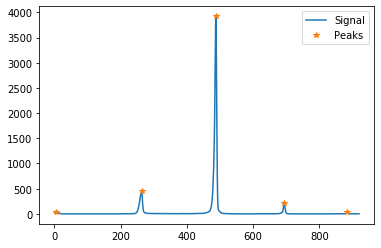

In [12]:
#2) Analizzo questi Spettri per capire come gestire le funzioni dopo
Data.How_Many_Peaks_To_VIPA(treshold = 30)
Analyze_Peaks(Data.x_VIPA, Data.y_VIPA, 'Pix', verbose=True, fig = True, height = Data.GHz_fit_height, width = 0.00001, distance = Data.VIPA_peaks_dist)

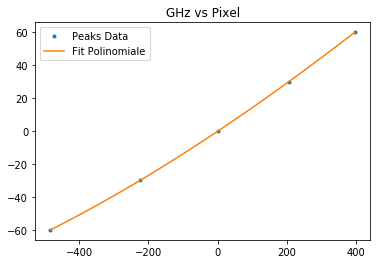

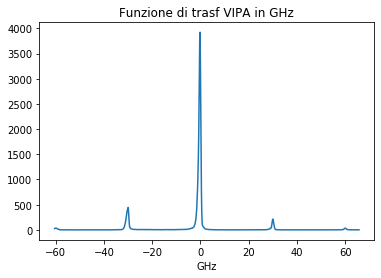

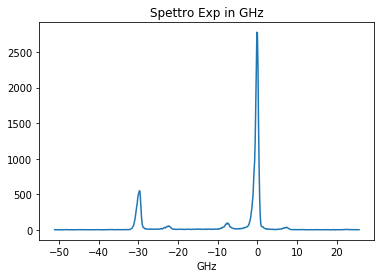

In [13]:
#3 converto tutto in GHz
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig=True)
Data.Spectrum_Pix2GHz(fig=True)

Ho trovato valore dell'altezza per avere 4 picchi: 53.000000
 (array([180, 238, 349, 402], dtype=int64), {'peak_heights': array([ 549.94444444,   53.27777778,   93.66666667, 2778.        ]), 'prominences': array([ 545.33333333,   46.72222222,   82.72222222, 2779.05555556]), 'left_bases': array([ 19, 208, 279,  19], dtype=int64), 'right_bases': array([279, 279, 366, 539], dtype=int64), 'widths': array([ 9.78044016, 10.22532127,  9.14826051,  5.88293817]), 'width_heights': array([ 277.27777778,   29.91666667,   52.30555556, 1388.47222222]), 'left_ips': array([173.05947581, 231.36343612, 343.41312057, 399.2710355 ]), 'right_ips': array([182.83991597, 241.5887574 , 352.56138107, 405.15397367])})


 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 53.00 
 Spessore > 0.01 



 Il picco 1 ha: 	 indice = 180 	 x_value (GHz) = -29.66 	 ampiezza(GHz) = 9.78 	 altezza = 549.94 


 Il picco 2 ha: 	 indice = 238 	 x_value (GHz) = -22.25 	 ampiezza(GHz) = 

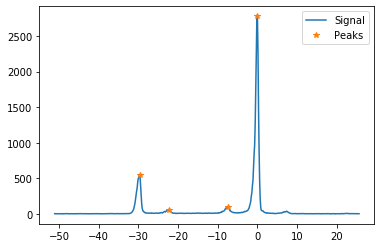

In [14]:
Data.How_Many_Peaks_To(distance=10., treshold= 50, fig = True, verbose = True)



Ho stimato 7 parametri iniziali per il fit che andrai a fare

Omega  = 7.400 

Gamma  = 0.969 

offset  = 14.439 

Co  = 1.000 

shift  = 0.000 

delta_amplitude  = 1.000 

delta_width  = 0.500 



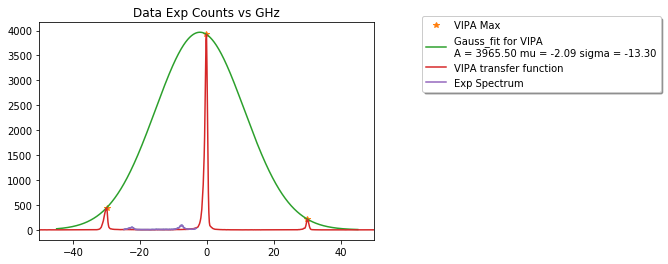

In [15]:
#4)Eseguo taglio dello Spettro sui picchi Brillouin
# e stimo gaussiana inviluppo dai dati VIPA

Data.Cut_n_Estimate_Spectrum(cut = True, distanza = 0.5, verbose = True)
plt.figure()
plot(Data.x_freq, Data.y)
plt.title('Data Exp Counts vs GHz')


Data.Fit_VIPA_Gaussian(fig = True)


In [0]:
#5) Stimo parametri iniziali con un fit ridotto
#5A) piccola prova iniziale
p0  =   pd.DataFrame(Data.p0, columns = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width','delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset'))


start = time.process_time()
_ = Data.Gauss_Convolve_Markovian_Response(Data.p0.values[0], fig = True, compare = True)
print("Secondi impiegati per conv = ", time.process_time()-start)
#_ = Data.Gauss_Convolve_Theoretical_Response(Data.p0.values[0], fig = True)

In [0]:
#5B) faccio er fit con modello markoviano 
bounds_down     =    [0,Get_Around(p0['Omega'][0], 0.1)[0],0,0,0, Get_Around(p0['A'][0], 0.1)[0], Get_Around(p0['mu'][0], 0.1)[0], Get_Around(p0['sigma'][0], 0.1)[0], -np.inf, -np.inf]
bounds_up       =    [np.inf, Get_Around(p0['Omega'][0], 0.1)[1],np.inf, np.inf, np.inf, Get_Around(p0['A'][0], 0.1)[1], Get_Around(p0['mu'][0], 0.1)[1], Get_Around(p0['sigma'][0], 0.1)[1], np.inf, np.inf]
Data.Non_Linear_Least_Squares_Markov(p0 = 'auto', my_method = 'least_squares', verbose = 2, fig = True, bound = (bounds_down, bounds_up), ftol = None)

In [0]:
#6) je passo i risultati
Data.Estimate_Initial_Parameters()
print(Data.p0)
_ = Data.Take_A_Look_Before_Fitting()


In [0]:
#7) faccio er fit markoviano +  rilassamento exp

Lower = Get_Around(Data.p0.values, 0.1)[0][0]

Upper= Get_Around(Data.p0.values, 0.1)[1][0]
Lower = np.concatenate((Lower[0:3], [0], [0], Lower[5:]))
Upper = np.concatenate((Upper[0:3], [np.inf], [np.inf], Upper[5:]))
Data.Non_Linear_Least_Squares(p0 = 'auto', my_method = 'least_squares', verbose = 2, fig = True,  bound = (Lower, Upper))




In [0]:
Data.Fit_Params